In [46]:
access_token = "3905284168-beFyAbGSJcQDI2PUqGIaZ1Drr7AdYNJNmg0UGzR"
access_secret = "B7FaFaY8QQKmkhJ7myJpRKQNTNFdMJgU011IDB91ibMpS"
consumer_key = "s9nXjWDHN2p7nclB9PXsJx9rh"
consumer_secret = "FOD1fJaq62E0zUjq6qVJqMgIrlk5Ekz65GGh63YfnAwuhDiaoN"

In [2]:
from tweepy.streaming import StreamListener

In [3]:
from tweepy import API

In [4]:
from tweepy import Cursor

In [5]:
from tweepy import OAuthHandler

In [6]:
from tweepy import Stream

In [7]:
import numpy as np

In [8]:
import pandas as pd

In [50]:
%pylab
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [9]:
class TwitterClient():
    def __init__(self, twitter_user = None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)
        
        self.twitter_user = twitter_user
        
    def get_twitter_client_api(self):
        return self.twitter_client
        
        
    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline,id = self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets
    
    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id = self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list
        print()
    
    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id = self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
        

In [10]:
class TwitterAuthenticator():
    def authenticate_twitter_app(self):
        auth = OAuthHandler(consumer_key,consumer_secret)
        auth.set_access_token(access_token,access_secret)
        return auth
        

In [11]:
class TwitterStreamer():
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()
    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        listener = TwitterListener()
        
        stream = Stream(auth,listener)

        stream.filter(track = hash_tag_list)

    
    

In [12]:
class TwitterListener(StreamListener):
    def __init__(self,fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename
    
    def on_data(self,data):
        try:
            print(data)
            with open(self.fetched_tweets_filename,'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on the data: %s" %str(e))
        return True
    
    def on_error(self,status):
        if status == 420:
            return False
        print(status)
        
        

In [43]:
class TweetAnalyzer():
    def tweets_to_dataframe(self,tweets):
        df = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['tweets'])
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweet'] = np.array([tweet.retweet_count for tweet in tweets])
        return df

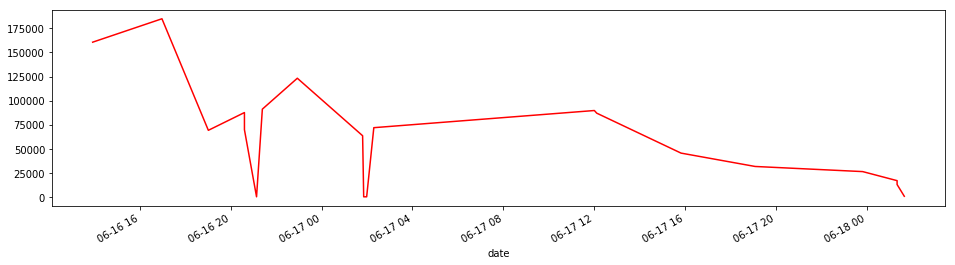

In [52]:
if __name__ == "__main__":
    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()
    api = twitter_client.get_twitter_client_api()
    
    tweets = api.user_timeline(screen_name = 'realDonaldTrump',count = 20)
    df = tweet_analyzer.tweets_to_dataframe(tweets)

    #print(np.max(df['likes'])) #no of likes max
    #print(np.mean(df['len'])) we have not permission to find the avg of tweets
    #print(dir(tweets[0]))
    #print(np.max(df['retweet']))
    
    time_likes = pd.Series(data=df['likes'].values, index = df['date'])
    time_likes.plot(figsize=(16,4), color='r')
    plt.show()
   

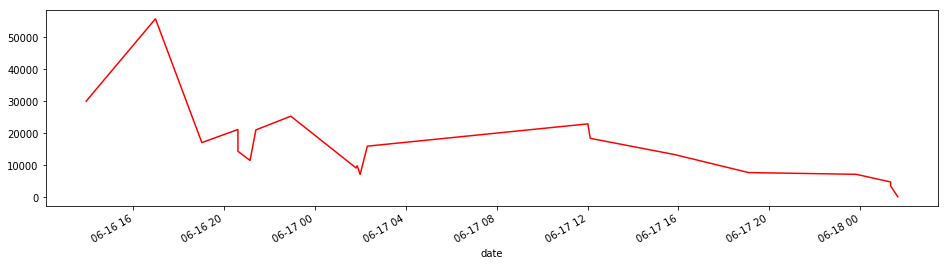

In [53]:
    time_retweets = pd.Series(data=df['retweet'].values, index = df['date'])
    time_retweets.plot(figsize=(16,4), color='r')
    plt.show()

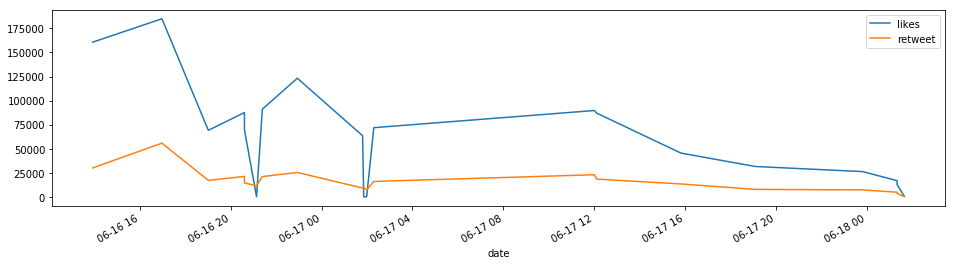

In [54]:
time_retweets = pd.Series(data=df['likes'].values, index = df['date'])
time_retweets.plot(figsize=(16,4), label='likes',legend=True)
    
time_retweets = pd.Series(data=df['retweet'].values, index = df['date'])
time_retweets.plot(figsize=(16,4), label='retweet',legend=True)

plt.show()